# Qiskit Tutorials 
Tutorials from 
https://qiskit.org/documentation/tutorials/advanced/terra/1_advanced_circuits.html

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute, BasicAer
from qiskit.visualization import plot_bloch_multivector

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Optional registers

In [2]:
qc = QuantumCircuit(3, 2)
print(qc.qregs)
print(qc.cregs)
##This is equivalent to the following.

[QuantumRegister(3, 'q')]
[ClassicalRegister(2, 'c')]


In [3]:
qr = QuantumRegister(3, name='q')
cr = ClassicalRegister(2, name='c')
qc = QuantumCircuit(qr, cr)

# Checking the quantum and classical registers
print(qc.qregs)
print(qc.cregs)

[QuantumRegister(3, 'q')]
[ClassicalRegister(2, 'c')]


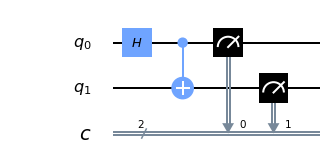

In [4]:
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)
#Syntax: QuantumCircuit.measure(qubit, cbit)
bell.measure([0,1], [0,1])

bell.draw(output='mpl')

Qubit ordering: [Qubit(QuantumRegister(1, 'q2'), 0), Qubit(QuantumRegister(1, 'q1'), 0)]
Classical bit ordering: [Clbit(ClassicalRegister(2, 'c'), 0), Clbit(ClassicalRegister(2, 'c'), 1)]


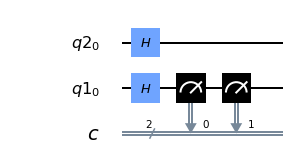

In [5]:
qr1 = QuantumRegister(1, 'q1')
qr2 = QuantumRegister(1, 'q2')
cr = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qr2, qr1, cr)

print('Qubit ordering:', circuit.qubits)  # quantum
print('Classical bit ordering:', circuit.clbits)  # classical

circuit.h([1,0])   # hadamard gate on both 1 and 0 qubits
circuit.measure(1, [0,1])   # 1 qubit  and 2 clbit
circuit.draw(output='mpl')

## Portable Instructions and CompositeGate replacement

In [6]:
from qiskit.circuit import Gate
# Syntax Gate(name, num_qubits, params, label=None)
my_gate = Gate(name='my_gate', num_qubits=2, params=[])
print (my_gate.params)

[]


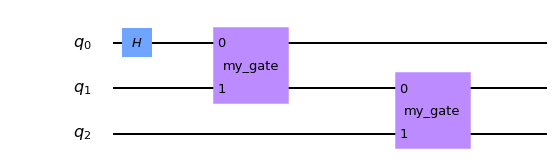

In [7]:
circ = QuantumCircuit(qr)
circ.h(0)
circ.append(my_gate, [qr[0], qr[1]])
circ.append(my_gate, [qr[1], qr[2]])

circ.draw(output='mpl')

### crz gate

##### syntax: QuantumCircuit.crz(theta, control_qubit,*, target_qubit, ctl=None, tgt=None)**

 A cRz gate implements a theta radian rotation of the qubit state vector about the z axis of the Bloch sphere when the control qubit is in state |1>.
 
### Barrier Gate
**Syntax: QuantumCircuit.barrier(*qargs)**
Apply barrier to circuit.

### u3 Gate
##### Syntax QuantumCircuit.u3(theta, phi, lam, qubit, *, q=None)
Apply U3 gate with angle theta, phi, and lam to a specified qubit (qubit). 

u3(θ, φ, λ) := U(θ, φ, λ) = Rz(φ + 3π)Rx(π/2)Rz(θ + π)Rx(π/2)Rz(λ)

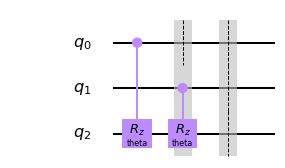

In [8]:
from qiskit.circuit import QuantumCircuit, Parameter

theta = Parameter('theta')
test_ckt = QuantumCircuit(3)
#Syntax crz(theta, control_qubit, target_qubit, *, ctl=None, tgt=None)
test_ckt.crz(theta,0,2)
test_ckt.crz(theta,1,2)
test_ckt.barrier(0)
test_ckt.barrier()
test_ckt.draw(output='mpl')

## Printing Matrices of Gates

In [10]:
from qiskit.extensions.standard.ch import HGate
from qiskit.extensions.standard.iden import IdGate
from qiskit.extensions.standard.cx import CnotGate

print ("Identity: \n", IdGate().to_matrix().real )
print ()
print ("Hadamard: \n", HGate().to_matrix().real )
print ()
print ("CNOT: \n", CnotGate().to_matrix().real )

Identity: 
 [[1. 0.]
 [0. 1.]]

Hadamard: 
 [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

CNOT: 
 [[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


Remember CNOT gates needs two qubits the works as following

* CNOT |00> -> |00>
* CNOT |01> -> |11>
* CNOT |10> -> |10>
* CNOT |11> -> |01>

That can easily be shown as matrix multiplication as well.


[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


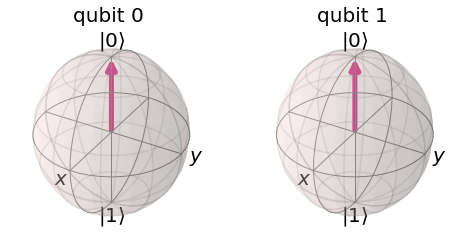

In [11]:
qcN = QuantumCircuit(2, 2)
qcN.h(0)
#qcN.cx(0, 1)
qcN.measure([0, 1], [0, 1])

backend = BasicAer.get_backend('statevector_simulator')
res = execute(qcN, backend).result()
out_state = res.get_statevector(qcN, decimals=3)
print (out_state)
plot_bloch_multivector(out_state)


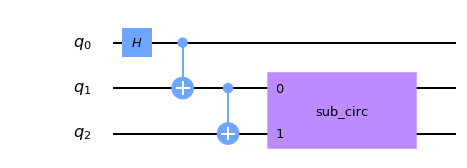

In [12]:
# Build a sub-circuit
sub_q = QuantumRegister(2)
sub_circ = QuantumCircuit(sub_q, name='sub_circ')
sub_circ.h(sub_q[0])
sub_circ.crz(1, sub_q[0], sub_q[1])
sub_circ.barrier()
sub_circ.iden(sub_q[1])
sub_circ.u3(1, 2, -2, sub_q[0])

# Convert to a gate and stick it into an arbitrary place in the bigger ckt
sub_inst = sub_circ.to_instruction()

q = QuantumRegister(3, 'q')
circ = QuantumCircuit(q)
circ.h(qr[0])
circ.cx(qr[0], qr[1])
circ.cx(qr[1], qr[2])
circ.append(sub_inst, [q[1], q[2]])

circ.draw(output='mpl')

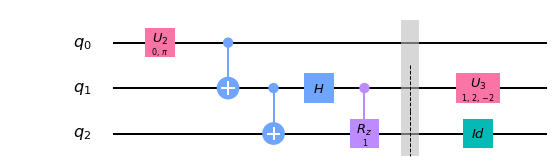

In [13]:
decomposed_circ = circ.decompose() # Does not modify original circuit
decomposed_circ.draw(output='mpl')

## Parameterized circuits

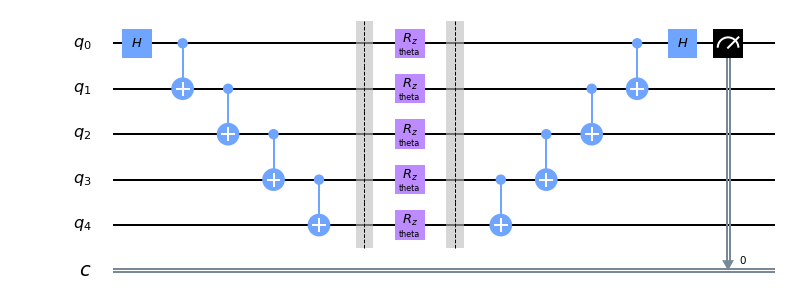

In [15]:
from qiskit.circuit import Parameter
%matplotlib inline

n=5
theta = Parameter('theta')
qc = QuantumCircuit(n, 1)
qc.h(0)
for i in range(n-1):
    qc.cx(i, i+1)
qc.barrier()
qc.rz(theta, range(Nbits))
#qc.rz(theta, [0,4])
qc.barrier()

for i in reversed(range(n-1)):
    qc.cx(i, i+1)
qc.h(0)
qc.measure(0, 0)


qc.draw(output='mpl')

### Binding parameters to values

Construct a series of experiments that vary the angle of a global $R_z$ rotation over a set of entangled qubits

In [16]:
theta_range = np.linspace(0, 2 * np.pi, 128)

circuits = [qc.bind_parameters({theta: theta_val})
            for theta_val in theta_range]

print(circuits[-1].draw(fold=120))
print(circuits[-1].parameters)### Binding parameters to values

        ┌───┐                     ░ ┌──────────────────────┐ ░                     ┌───┐┌─┐
q_0: |0>┤ H ├──■──────────────────░─┤ Rz(6.28318530717959) ├─░──────────────────■──┤ H ├┤M├
        └───┘┌─┴─┐                ░ ├──────────────────────┤ ░                ┌─┴─┐└───┘└╥┘
q_1: |0>─────┤ X ├──■─────────────░─┤ Rz(6.28318530717959) ├─░─────────────■──┤ X ├──────╫─
             └───┘┌─┴─┐           ░ ├──────────────────────┤ ░           ┌─┴─┐└───┘      ║ 
q_2: |0>──────────┤ X ├──■────────░─┤ Rz(6.28318530717959) ├─░────────■──┤ X ├───────────╫─
                  └───┘┌─┴─┐      ░ ├──────────────────────┤ ░      ┌─┴─┐└───┘           ║ 
q_3: |0>───────────────┤ X ├──■───░─┤ Rz(6.28318530717959) ├─░───■──┤ X ├────────────────╫─
                       └───┘┌─┴─┐ ░ ├──────────────────────┤ ░ ┌─┴─┐└───┘                ║ 
q_4: |0>────────────────────┤ X ├─░─┤ Rz(6.28318530717959) ├─░─┤ X ├─────────────────────╫─
                            └───┘ ░ └──────────────────────┘ ░ └───┘            

In [17]:
job = execute(qc,
              backend=BasicAer.get_backend('qasm_simulator'),
              parameter_binds=[{theta: theta_val} for theta_val in theta_range], 
             shots=2000)

counts = [job.result().get_counts(i) for i in range(len(job.result().results))]


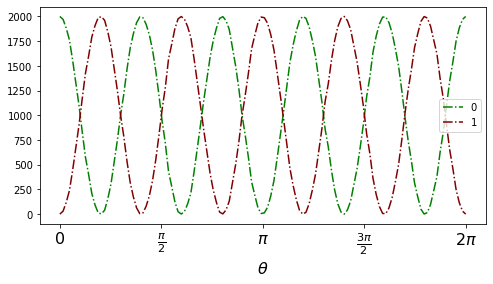

In [18]:
plt.figure(figsize=(8,4))
plt.plot(theta_range, list(map(lambda c: c.get('0', 0), counts)), '-.', label='0', color='green')
plt.plot(theta_range, list(map(lambda c: c.get('1', 0), counts)), '-.', label='1', color='maroon')

labs = ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$']

plt.xticks([i * np.pi / 2 for i in range(5)], labs, fontsize=16)
plt.xlabel('$\\theta$', fontsize=16);
plt.legend();

## Reducing compilation cost

In [ ]:
import time
from itertools import combinations
from qiskit.compiler import transpile, assemble
from qiskit.test.mock import FakeTokyo

start = time.time()
qcs = []

theta_range = np.linspace(0, 2*np.pi, 16)

for n in theta_range:
    qc = QuantumCircuit(5)

    for k in range(8):
        for i,j in combinations(range(5), 2):
            qc.cx(i,j)
        qc.rz(n, range(5))
        for i,j in combinations(range(5), 2):
            qc.cx(i,j)

    qcs.append(qc)

compiled_circuits = transpile(qcs, backend=FakeTokyo())
qobj = assemble(compiled_circuits, backend=FakeTokyo())

end = time.time()
print('Time compiling over set of bound circuits: ', end-start)

In [ ]:
start = time.time()
qc = QuantumCircuit(5)
theta = Parameter('theta')

for k in range(4):
    for i,j in combinations(range(5), 2):
        qc.cx(i,j)
    qc.rz(theta, range(5))
    for i,j in combinations(range(5), 2):
        qc.cx(i,j)

transpiled_qc = transpile(qc, backend=FakeTokyo())
qobj = assemble([transpiled_qc.bind_parameters({theta: n})
                 for n in theta_range], backend=FakeTokyo())
end = time.time()
print('Time compiling over parameterized circuit, then binding: ', end-start)

## Composition

In [ ]:
phi = Parameter('phi')

sub_circ1 = QuantumCircuit(2, name='sc_1')
sub_circ1.rz(phi, 0)
sub_circ1.rx(phi, 1)

sub_circ2 = QuantumCircuit(2, name='sc_2')
sub_circ2.rx(phi, 0)
sub_circ2.rz(phi, 1)

qc = QuantumCircuit(4)
qr = qc.qregs[0]

qc.append(sub_circ1.to_instruction(), [qr[0], qr[1]])
qc.append(sub_circ2.to_instruction(), [qr[0], qr[1]])

qc.append(sub_circ2.to_instruction(), [qr[2], qr[3]])

print(qc.draw())

# The following raises an error: "QiskitError: 'Name conflict on adding parameter: phi'"
# phi2 = Parameter('phi')
# qc.u3(0.1, phi2, 0.3, 0)

In [ ]:
p = Parameter('p')
qc = QuantumCircuit(3, name='oracle')
qc.rz(p, 0)
qc.cx(0, 1)
qc.rz(p, 1)
qc.cx(1, 2)
qc.rz(p, 2)

theta = Parameter('theta')
phi = Parameter('phi')
gamma = Parameter('gamma')

qr = QuantumRegister(9)
larger_qc = QuantumCircuit(qr)
larger_qc.append(qc.to_instruction({p: theta}), qr[0:3])
larger_qc.append(qc.to_instruction({p: phi}), qr[3:6])
larger_qc.append(qc.to_instruction({p: gamma}), qr[6:9])
print(larger_qc.draw())

print(larger_qc.decompose().draw())

# TMP codes